# Statistics Notebook 02
<br>
This is the second notebook of the series of statistics methods using python modules such as Numpy, SciPy.stats and statmodels. <br>
This notbook covers the methods using Scipuy.stats

### Import required libraries 

In [3]:
import numpy as np
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [80]:
#1 Normal distribution object 
X = stats.norm(1,0.5) # Mean =1 and Standard deviation = 0.5

X is an object that represents a random variable having mean 1 and standard deviation of 0.5. The object X can be used to get other properties of this distribution such as pdf, cdf, sf, ppf, etc. See the examples below. 

Start with descriptive statistics, Mean, standard deviationa and variance 

In [5]:
X.mean()

1.0

In [6]:
X.std()

0.5

In [7]:
X.var()

0.25

"stats" method returns the inputs used to create this object

In [8]:
X.stats() # This returns mean and variance

(array(1.), array(0.25))

I am going to estimate the probability distribution function (pdf) and cumulative distribution function (cdf) here. 

In [9]:
X.pdf([0,1,2])

array([0.10798193, 0.79788456, 0.10798193])

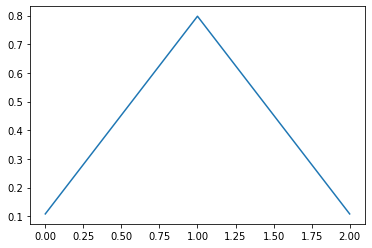

In [10]:
plt.plot([0,1,2], X.pdf([0,1,2]))

Here, I input a list "[0,1,2]" to compute the pdf. pdf method produces the probability to find 0, 1 and 2 in the sample, provided mean is 1 and standard deviation is 0.5. As expected, 1 has a high probability. 0 and 2 have low probabiloties. 

In [11]:
X.pdf([100,101,102])

array([0., 0., 0.])

I replaced the list with "[101,102,103]". Remember that, our random variable object, "X" is created using mean=1 and std = 0.5. Finding a mean of 1 is impossible from this input. Therefore, the pdf is all zero in this case. 

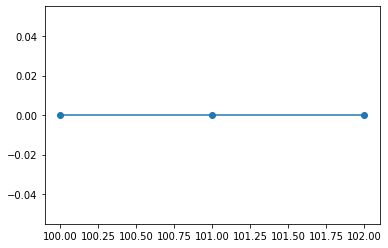

In [12]:
plt.plot([100,101,102], X.pdf([100,101,102]), '-o')

In [13]:
print(X.cdf([0,1,2]))
X.pdf([0,1,2])

[0.02275013 0.5        0.97724987]


array([0.10798193, 0.79788456, 0.10798193])

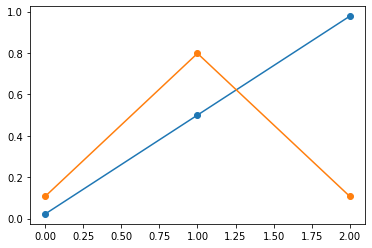

In [14]:
plt.plot(X.cdf([0,1,2]),'-o')
plt.plot(X.pdf([0,1,2]),'-o')

CDF is cumulative distribution function or in plain language accumulated probability <br>
CDF is bound between 0 and 1 
<br> CDF is the sum of area under the PDF curve.
<br> I will show explain more about this later

Another useful method is "interval". This method can be used to select the x values falls within a given upper and lower bounds of probability distribution. <br>
Also can be used to determine the cofidence interval

In [15]:
# Consider again the object "X" I created.
# Compute the upper and lower limits where 95% of data lies 
X.interval(0.95)

(0.020018007729972975, 1.979981992270027)

Here, 95% of the data lies between 0.02 and 1.9799 

In [16]:
X.interval(0.99)

(-0.2879146517744502, 2.28791465177445)

Or as confidence interval. 99% of the data lies between the above estimated interval. 

## Plotting pdf, cdf, sf and ppf of normalized distribution
<br> I already created a random variable object, "X", for a normalized distribution with mean=1 and std=0.5.
<br> Floowing lines demonstrates how to visulize the pdf, cdf, sf = (1-cdf) and ppf (inv(cdf))

In [81]:
x_min_999, x_max_999 = X.interval(0.999) # Estimating the upper and lower bound of the distribution 
print(x_min_999, x_max_999)

-0.6452633657459472 2.6452633657459628


In [82]:
x999 = np.linspace(x_min_999, x_max_999, 1000) # Generating the numbers between upper and lower bounds, pdf, cdf, sf and ppf needs to be calculated 

In [83]:
# Similarly, I am going to estimate the lower and upper bounds of 95% cofidence interval. This I will use to shade the area that contains 95% of probability distribution. 
x_min_95, x_max_95 = X.interval(0.95)  
x95 = np.linspace(x_min_95, x_max_95, 1000)

<b> The figure below visulizes the ranage of variability of the random numbers generated using the above method. I haven't used all the numbers. Every 20th number is plotted. This is just to see the varaibility and range of the numbers. 

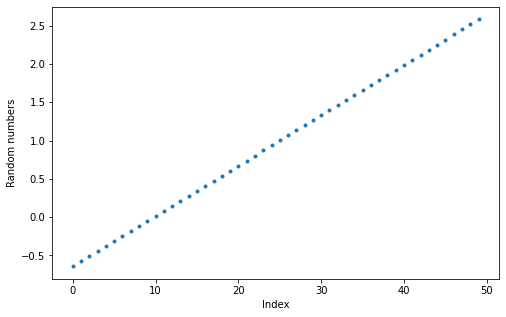

In [84]:
plt.figure(figsize=(8,5))
plt.plot(x999 [0:1001:20],'.')
plt.xlabel("Index")
plt.ylabel("Random numbers") # Generated using random variable object "X"
plt.show()

Next strp is to plot the pdf, cdf, sf and ppf. <br>
Note that, Here I am going to check the probability distribution of the random numbers x999, which varies between x_min_999 and x_max_999. That means, in a normal distribution having a mean of 1 and std of 0.5, this will give what is the probability of "seeing" each number in x999

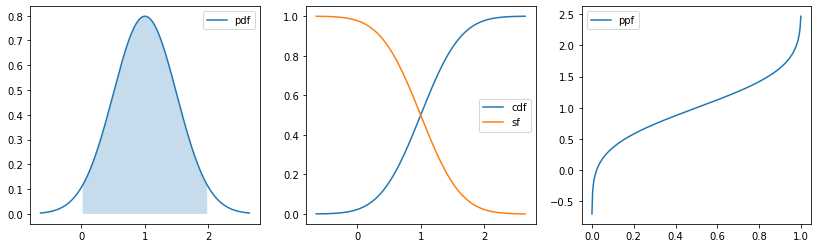

In [85]:
fig,ax = plt.subplots(1,3,figsize=(14,4))
# probability distribution function (pdf)
ax[0].plot(x999, X.pdf(x999), label="pdf")
ax[0].fill_between(x95, X.pdf(x95), alpha=0.25)
ax[0].legend()
# cumulative distribution function and survival function (1-cdf)
ax[1].plot(x999, X.cdf(x999), label = "cdf")
ax[1].plot(x999, X.sf(x999), label = "sf")
ax[1].legend()
# percent point function 
ax[2].plot(x999, X.ppf(x999), label = "ppf")
ax[2].legend()
plt.show()

### F distribution 

We can make similar figures for F-distribution. Another continous distribution. For, this I need to make a random variable object, then go from there... 
<br> YouTube link to F-distribution https://www.youtube.com/watch?v=S8VzUYJjBmw
<br> Statistical degree of freedom: https://blog.minitab.com/en/statistics-and-quality-data-analysis/what-are-degrees-of-freedom-in-statistics

In [86]:
X = stats.f(3,5) # Here the inputs are the degree of freedom (#samples - 1) of two samples. Checkout the YouTube link.
# Try experimenting by changing degree of freedom inputs 

Okay, now I got the object. Next step is to make the random numbers that follow this distribution, similar to what I did for the normal distribution

In [87]:
x_min_999, x_max_999 = X.interval(0.999)
x999 = np.linspace(x_min_999, x_max_999, 1000)
x_min_95, x_max_95 = X.interval(0.95)  
x95 = np.linspace(x_min_95, x_max_95, 1000)

Now I am ready to visulize the results 

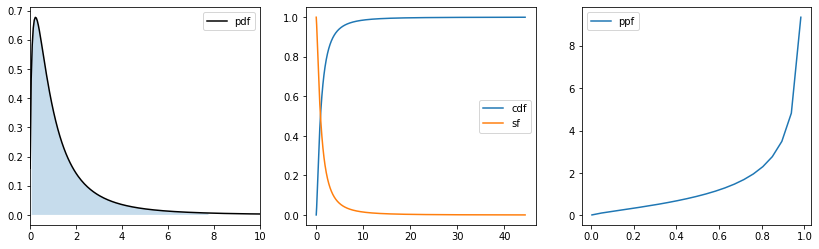

In [88]:
fig,ax = plt.subplots(1,3,figsize=(14,4))
# probability distribution function (pdf)
ax[0].plot(x999, X.pdf(x999), 'k',label="pdf")
ax[0].fill_between(x95, X.pdf(x95), alpha=0.25)
ax[0].set_xlim(0,10)
ax[0].legend()
# cumulative distribution function and survival function (1-cdf)
ax[1].plot(x999, X.cdf(x999), label = "cdf")
ax[1].plot(x999, X.sf(x999), label = "sf")
ax[1].legend()
# percent point function 
ax[2].plot(x999, X.ppf(x999), label = "ppf")
ax[2].legend()
plt.show()

### Poisson Distribution

<br> I am going to try a discrete distribution. The Poisson Distribution

In [97]:
X = stats.poisson(5)

In [98]:
x999 = np.linspace(x_min_999, x_max_999, 1000)
x999_int = np.unique(x999.astype(int))
print(x999_int)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]


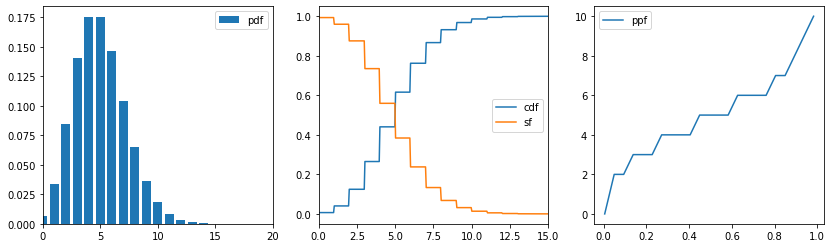

In [103]:
fig,ax = plt.subplots(1,3,figsize=(14,4))
# probability distribution function (pdf)
ax[0].bar(x999_int, X.pmf(x999_int), label="pdf")
ax[0].set_xlim(0,20)
ax[0].legend()
# cumulative distribution function and survival function (1-cdf)
ax[1].plot(x999, X.cdf(x999), label = "cdf")
ax[1].plot(x999, X.sf(x999), label = "sf")
ax[1].set_xlim(0,15)
ax[1].legend()
# percent point function 
ax[2].plot(x999, X.ppf(x999), label = "ppf")
ax[2].legend()
plt.show()